# Base level reproducibility

In this notebook we will study the reproducbility as defined in Koing et al 2010 - the fraction of bases with 2 or more tags on that are cross linked in at least one other replicate of the same protein. 

In [15]:
from CGAT import Database as DB
from CGAT import IOTools
import os
%load_ext rpy2.ipython
%R library(ggplot2)
%R library(dplyr)
%R library(scales)
%R library(Hmisc)
%R library(gplots)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


The data we need is conveniently all in the `base_level_reproducibility` table. We are looking at those with 2 or more tags, so level = 2.

In [16]:
statement = ''' SELECT * FROM base_level_reproducibility 
                WHERE level = 2 '''

data = DB.fetch_DataFrame(statement, "csvdb")
data[["Protein","Replicate"]] = data.Track.str.extract("(.+)-.+-(R.)")
data["fraction"] = data.hits/data.totals

Quite a hefty ggplot statement below! Most of it is concerned with the white filled, grey outlined boxes. This is to aid with the appreciation that we are talking about fractions of 100% rather than an unbounded statistic. 

/shared/conda-install/envs/cgat-devel-lite/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Saving 6.69 x 2.48 in image

  res = super(Function, self).__call__(*new_args, **new_kwargs)


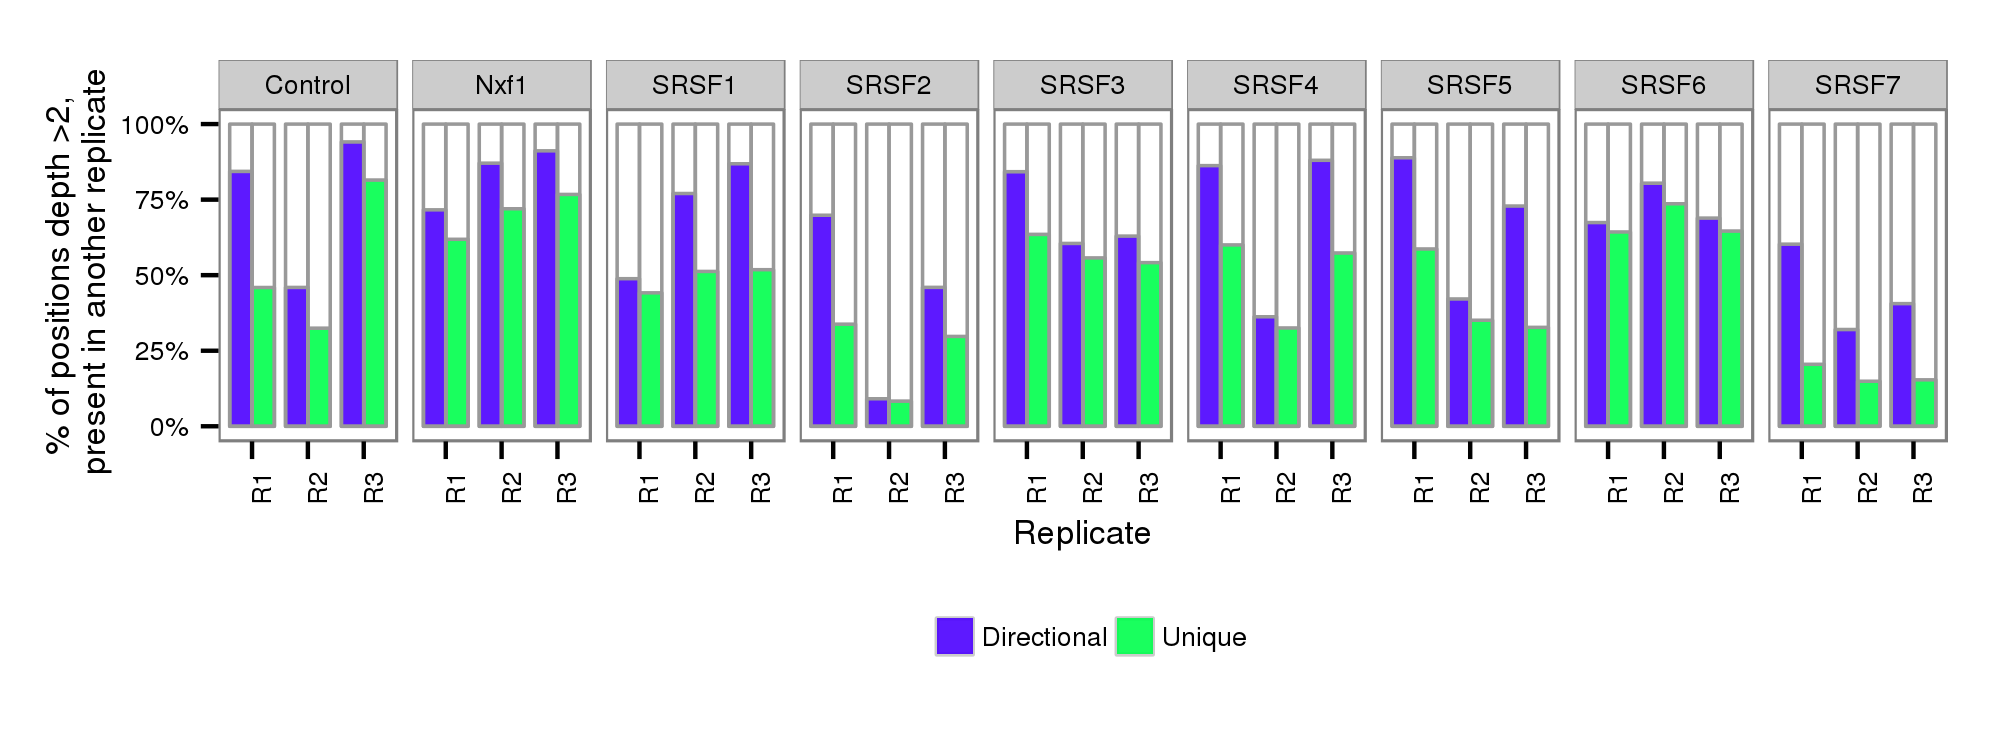

In [20]:
%%R -i data -w 170 -h 63 -u mm -r 300

g<- data %>% 
    subset(fold == 1 & method %in% c("directional","unique")) %>% 
    ggplot() + 
    aes(x=Replicate, y=fraction, shape=method, fill=method) +

    geom_bar(stat="identity", position=position_dodge(width=0.8), alpha=0.9, width=0.8) +
    geom_bar(stat="identity", position=position_dodge(width=0.8), alpha=0, col="grey60", width=0.8, lwd=0.4, show_guide=F) +    
    geom_bar(aes(fill=paste(method,1), y=1), stat="identity", 
             position=position_dodge(width=0.8), width=0.8, 
             col="grey60",
             lwd=0.4, show_guide=F, alpha=0) +
    facet_grid(~Protein, scale="free") +
    theme_bw(base_size=8) +
    scale_y_continuous(labels=percent, limits=c(0,1)) +
    guides(colour="none") +
    scale_fill_manual(breaks=c("directional","unique"), labels = c("Directional","Unique"),
                      values = c(topo.colors(4, alpha=0.5),"white")[c(1,5,3,5)], name = "") +
    ylab("% of positions depth >2,\n present in another replicate") +
    theme(axis.text.x = element_text(angle=90),
          legend.position="bottom",
          legend.key.size=unit(0.6,"lines"),
          panel.grid = element_blank())

print(g)
ggsave("plots/figure3b.svg")

Supplimentary figure 3 shows the same but for the percentile method (for comparison)

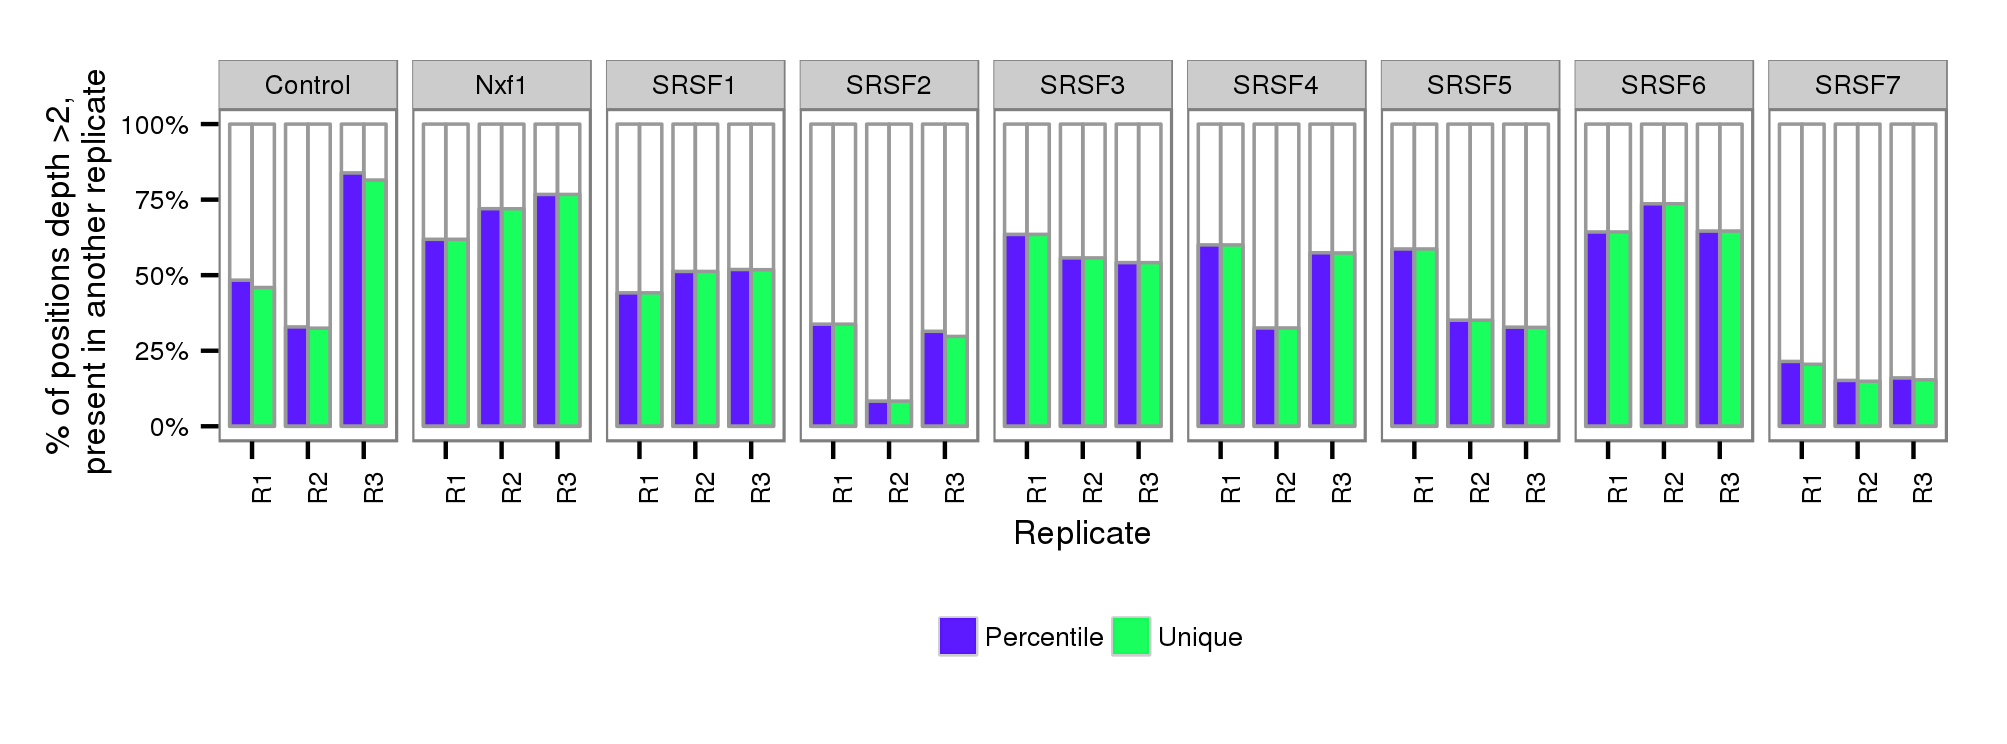

In [22]:
%%R -i data -w 170 -h 63 -u mm -r 300

g<- data %>% 
    subset(fold == 1 & method %in% c("percentile","unique")) %>% 
    ggplot() + 
    aes(x=Replicate, y=fraction, shape=method, fill=method) +

    geom_bar(stat="identity", position=position_dodge(width=0.8), alpha=0.9, width=0.8) +
    geom_bar(stat="identity", position=position_dodge(width=0.8), alpha=0, col="grey60", width=0.8, lwd=0.4, show_guide=F) +    
    geom_bar(aes(fill=paste(method,1), y=1), stat="identity", 
             position=position_dodge(width=0.8), width=0.8, 
             col="grey60",
             lwd=0.4, show_guide=F, alpha=0) +
#    geom_bar(aes(y=1), stat="identity", position = "identity", col="grey60", alpha=0, lwd=0.4, show_guide=F) + 
    facet_grid(~Protein, scale="free") +
    theme_bw(base_size=8) +
    scale_y_continuous(labels=percent, limits=c(0,1)) +
    guides(colour="none") +
    scale_fill_manual(breaks=c("percentile","unique"), labels = c("Percentile","Unique"),
                      values = c(topo.colors(4, alpha=0.5),"white")[c(1,5,3,5)], name = "") +
    ylab("% of positions depth >2,\n present in another replicate") +
    theme(axis.text.x = element_text(angle=90),
          legend.position="bottom",
          legend.key.size=unit(0.6,"lines"),
          panel.grid = element_blank())

print(g)
ggsave("plots/figureS3.svg")

The below just shows the same but for all methods. It does not form part of any figure

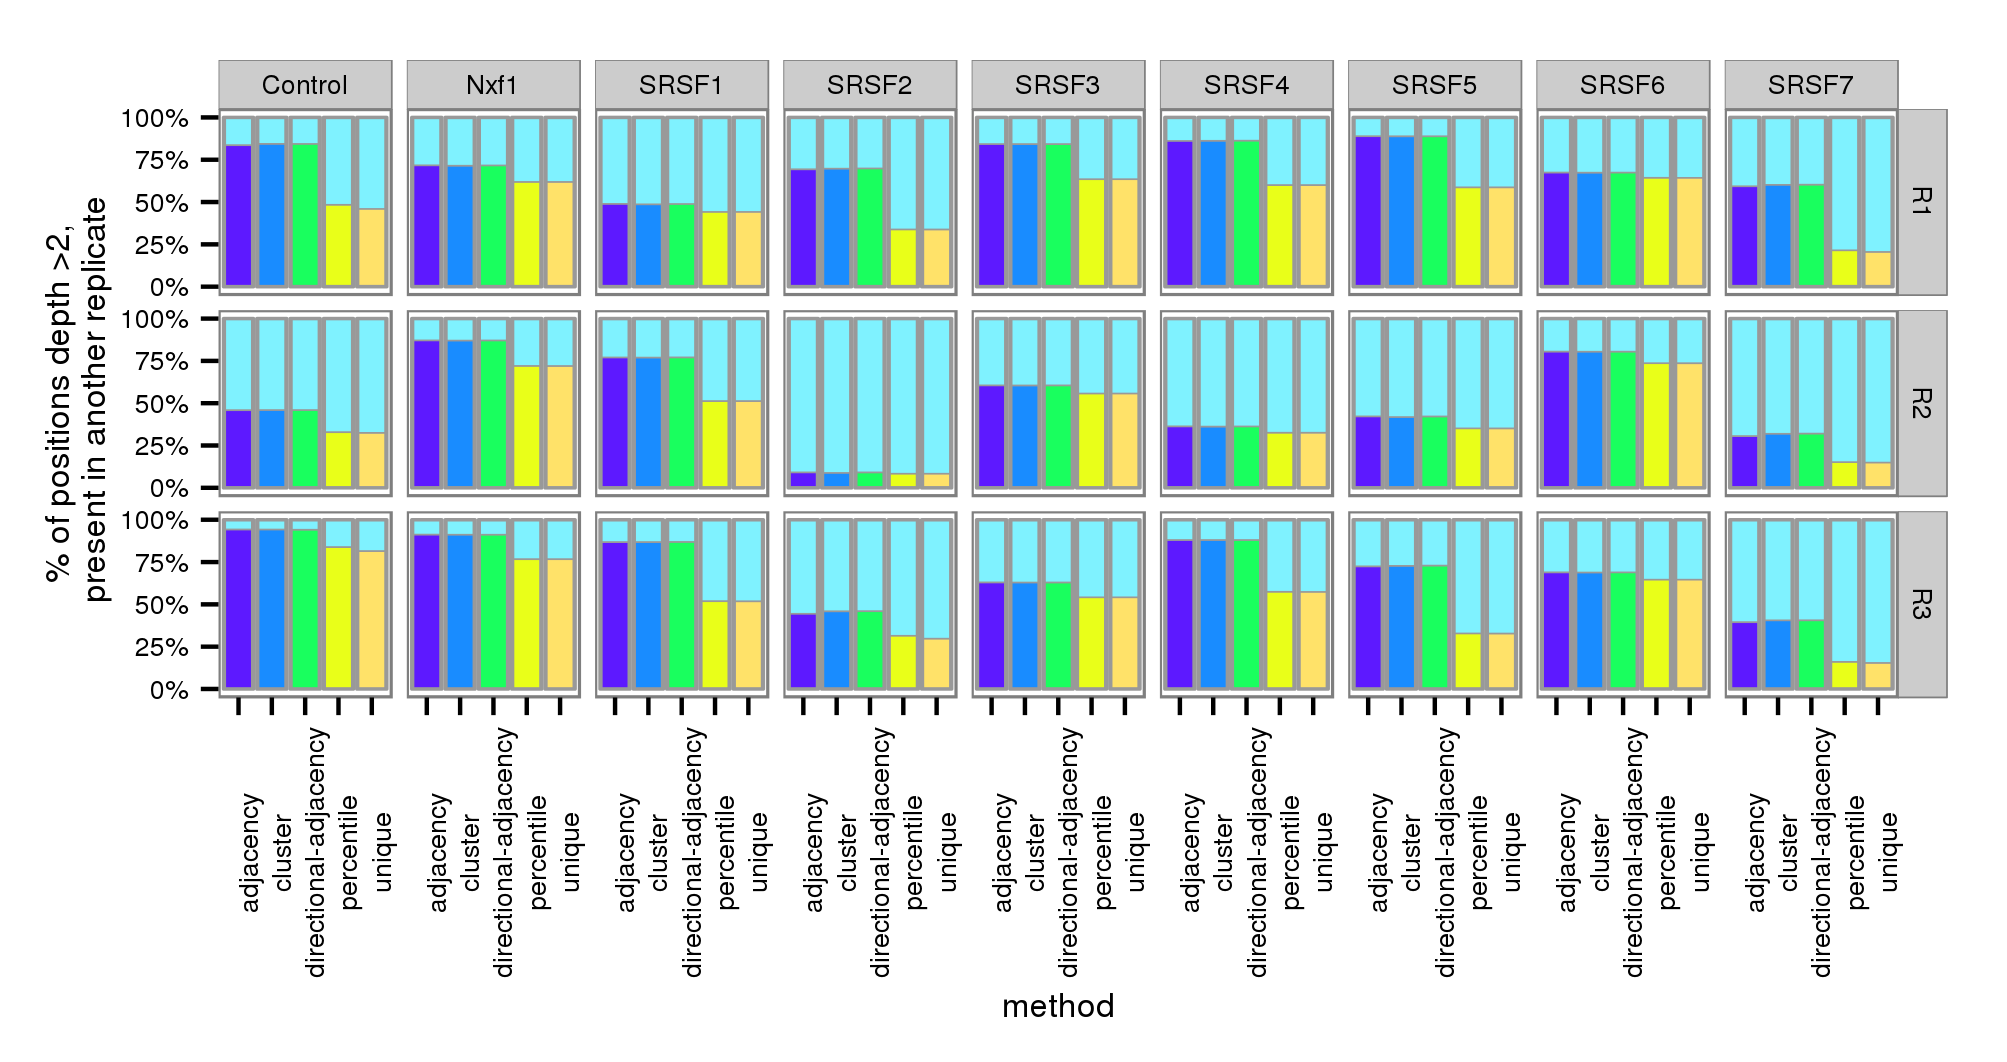

In [197]:
%%R -i data -w 170 -h 90 -u mm -r 300

g<- data %>% 
    subset(fold == 1) %>% 
    ggplot() + 
    aes(x=method, y=fraction, shape=method, fill=method) +
    geom_bar(aes(fill=paste(method,1), y=1), stat="identity", 
             position=position_dodge(width=0.9), width=0.8, 
             col="grey60",
             lwd=0.2, show_guide=F) +
    geom_bar(stat="identity", position=position_dodge(width=0.9), alpha=1, fill="white", width=0.8, show_guide=F) +
    geom_bar(stat="identity", position=position_dodge(width=0.9), alpha=0.9, width=0.8, col="grey60", lwd=0.2, show_guide=F) +
    geom_bar(aes(y=1), stat="identity", position = "identity", col="grey60", alpha=0, lwd=0.4, show_guide=F) + 
    facet_grid(Replicate~Protein, scale="free", space="free") +
    theme_bw(base_size=8) +
    scale_y_continuous(labels=percent) +
    guides(colour="none") +
    scale_fill_manual(breaks=c("unique", "percentile", "cluster", "adjacency", "directional"), labels = c("Unique", "Percentile", "Cluster", "Adjecency", "Directional"),
                      values = topo.colors(10, alpha=0.5)[c(1,4,3,4,5,4,7,4,9,4)], name = "") +
    ylab("% of positions depth >2,\n present in another replicate") +
    theme(axis.text.x = element_text(angle=90),
          legend.position="bottom",
          legend.key.size=unit(0.6,"lines"),
          panel.grid = element_blank())

print(g)


The actaul numbers for use in the text of the manuscript.

In [148]:
data[data.fold==1].pivot(
    index="Track", columns="method", values="fraction")

method,adjacency,cluster,directional-adjacency,percentile,unique
Track,,,,,
Control-GFP-R1.bam,0.836169,0.843691,0.843410,0.483485,0.459241
Control-GFP-R2.bam,0.458730,0.459471,0.459477,0.328836,0.324548
Control-GFP-R3.bam,0.942338,0.942215,0.940895,0.838356,0.814716
Nxf1-GFP-R1.bam,0.716924,0.714273,0.716212,0.618710,0.618705
Nxf1-GFP-R2.bam,0.871155,0.869842,0.870663,0.719909,0.719691
Nxf1-GFP-R3.bam,0.911979,0.911435,0.911379,0.767148,0.767148
SRSF1-GFP-R1.bam,0.488977,0.486483,0.488381,0.441504,0.441508
SRSF1-GFP-R2.bam,0.770296,0.769396,0.770336,0.512470,0.512460
SRSF1-GFP-R3.bam,0.867827,0.867998,0.868628,0.518787,0.518038
